In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def power_iteration(A, num_iterations: int): #it was taken from wikipedia: https://en.wikipedia.org/wiki/Power_iteration
    # A is the matrix
    # b_k is initialized as a random vector and in the end is the eigenvector
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_iterations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm

    return b_k

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Read the data file 'edges.csv' of Western US Power Grid

In [2]:
#dfN = pd.read_csv('nodes.csv') It was not used
dfE = pd.read_csv('edges.csv')

It was made a Graph G with the edgelist

In [3]:
G = nx.from_pandas_edgelist(dfE, source='# source', target=' target', create_using=nx.Graph()) 

The original graph

![](power.png)

It was plot the G graph

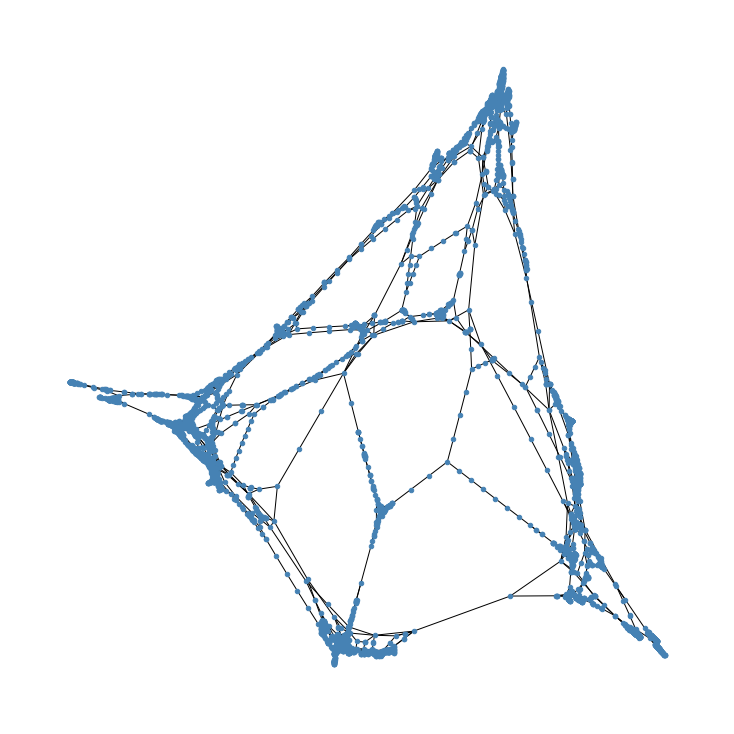

In [4]:
plt.figure(figsize=(10, 10))
pos = nx.spectral_layout(G) 
nx.draw(G, pos, with_labels=False, node_size=20, node_color='steelblue')

It was made a adjacency matrix using G

In [5]:
adjacency_matrix = nx.adjacency_matrix(G)

#The adjacency matrix was converted in a numpy matrix
adjacency_matrix_np = adjacency_matrix.toarray()

Using the power interation to find out the eigenvector nu

In [6]:
nu = power_iteration(adjacency_matrix_np, 1000)
print(nu)

[7.13474694e-23 9.53454229e-24 9.53454229e-24 ... 7.08094060e-19
 7.46655886e-17 1.35398537e-16]


Seeing the distribution of the eigenvector

Text(0, 0.5, 'Distribution')

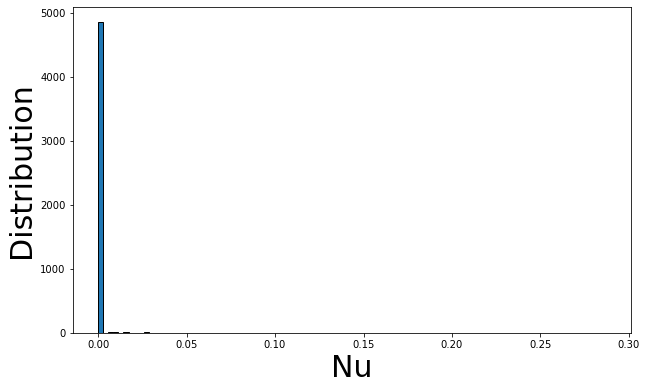

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(nu, bins=100, edgecolor='k')
ax = plt.gca()
ax.set_xlabel("Nu", fontsize=30)
ax.set_ylabel("Distribution", fontsize=30)

Applying the log10

Text(0, 0.5, 'Distribution')

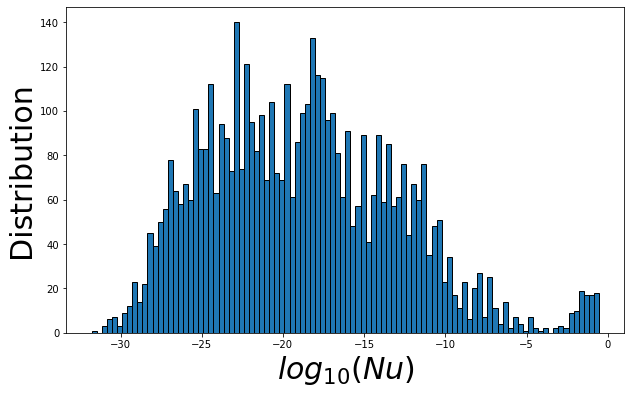

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(np.log10(nu), bins=100, edgecolor='k')
ax = plt.gca()
ax.set_xlabel(r"$log_{10}(Nu)$", fontsize=30)
ax.set_ylabel("Distribution", fontsize=30)

In [8]:
#G.degree()

Converting the numpy array in a Pandas serie 

In [11]:
Nu = pd.Series(nu)
Nu.max()

0.28664809705782557

Seeing the serie

In [12]:
Nu

0       7.134747e-23
1       9.534542e-24
2       9.534542e-24
3       5.148277e-22
4       1.341180e-22
            ...     
4936    7.802362e-18
4937    5.298704e-18
4938    7.080941e-19
4939    7.466559e-17
4940    1.353985e-16
Length: 4941, dtype: float64

Making a serie of nodes degree from the dictionaty G.degree()

In [15]:
k=pd.Series(dict(G.degree()))
kcore = pd.Series(dict(nx.core_number(G)))

In [16]:
kkcore = pd.DataFrame()
kkcore["k"]=k
kkcore["kcore"]=kcore
kkcore = kkcore.sort_index()
kkcore

,k,kcore
0,3,2
1,4,2
2,1,1
3,1,1
4,1,1
...,...,...
4936,1,1
4937,2,1
4938,2,1
4939,2,2


Function to calculate the Standard Error

In [17]:
def standard_error(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

In [18]:
dfkkcorePlot = kkcore.groupby('kcore').agg({'k': ['mean', standard_error]}).reset_index()
dfkkcorePlot.columns = ['kcore', 'k_mean', 'SE']
dfkkcorePlot.fillna(0, inplace=True)
dfkkcorePlot

,kcore,k_mean,SE
0,1,1.321788,0.017395
1,2,3.118834,0.028018
2,3,5.471795,0.178444
3,4,7.708333,0.505331
4,5,8.333333,0.655204


/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'k')

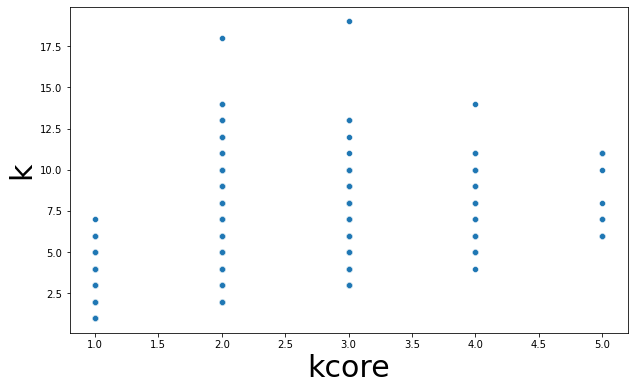

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="kcore", y="k", data=kkcore)

ax = plt.gca()
ax.set_xlabel("kcore", fontsize=30)
ax.set_ylabel("k", fontsize=30)

/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'k mean')

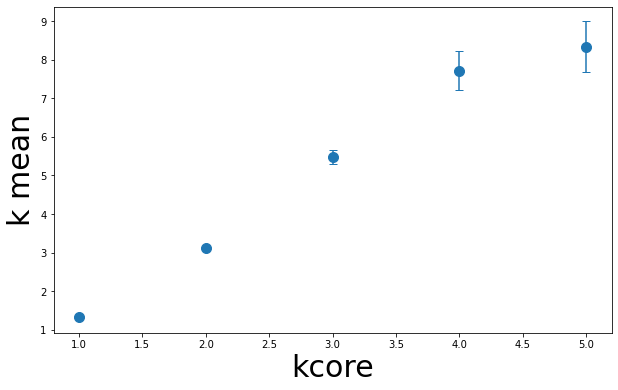

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="kcore", y="k_mean", data=dfkkcorePlot)

# Adicionar barras de erro usando plt.errorbar()
plt.errorbar(x=dfkkcorePlot['kcore'], y=dfkkcorePlot['k_mean'], yerr=dfkkcorePlot['SE'], linestyle='None', fmt='o', capsize=4,ms=10)
ax = plt.gca()
ax.set_xlabel("kcore", fontsize=30)
ax.set_ylabel("k mean", fontsize=30)

Making a DataFrame from k

In [21]:
dfkNu = pd.DataFrame()
dfkNu['k'] = k

dfkNu.head()

,k
8,3
6,1
7,1
9,6
10,2


Sorting by the index

In [21]:
dfkNu = dfkNu.sort_index()
dfkNu.head()

,k
0,3
1,4
2,1
3,1
4,1


Adding Nu in the DataFrame

In [22]:
dfkNu['Nu'] = Nu
dfkNu.head()

,k,Nu
8,3,8.172650e-27
6,1,5.044343e-27
7,1,4.740172e-27
9,6,4.740172e-27
10,2,1.092155e-27


In [ ]:
#dfaux['Nu'].unique()

/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Nu')

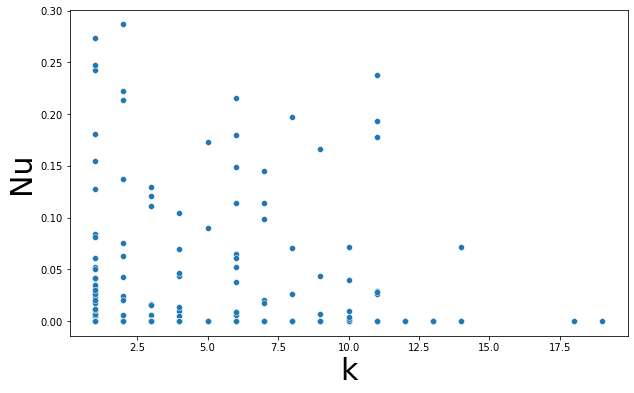

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="k", y="Nu", data=dfkNu)
ax = plt.gca()
ax.set_xlabel("k", fontsize=30)
ax.set_ylabel("Nu", fontsize=30)

Grouping by degrees and calculating means and errors

In [24]:
dfkNuPlot = dfkNu.groupby('k').agg({'Nu': ['mean', standard_error]}).reset_index()
dfkNuPlot.columns = ['k', 'Nu_mean', 'Nu_SE']
#dfkNuPlot['std']= dfkNuPlot['std']/np.sqrt(len(Nu))
dfkNuPlot.fillna(0, inplace=True)
dfkNuPlot

,k,Nu_mean,Nu_SE
0,1,1.650911e-03,4.475700e-04
1,2,6.595838e-04,2.755000e-04
2,3,3.948866e-04,1.992557e-04
3,4,7.341839e-04,3.526690e-04
4,5,1.045328e-03,7.736872e-04
5,6,6.539171e-03,2.537913e-03
6,7,4.702181e-03,2.468768e-03
7,8,6.379256e-03,4.533722e-03
8,9,8.026130e-03,6.291220e-03
9,10,4.878428e-03,3.095931e-03


Plotting

/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Nu mean')

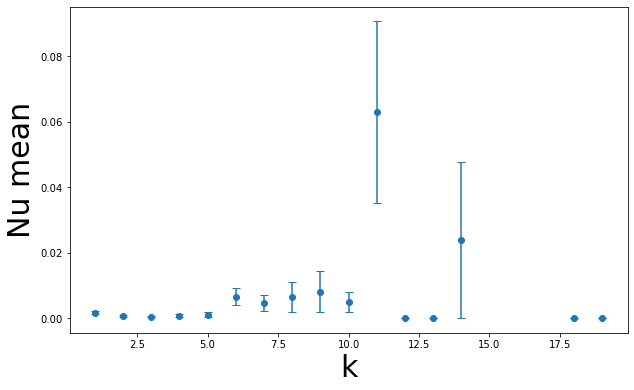

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="k", y="Nu_mean", data=dfkNuPlot)
plt.errorbar(x=dfkNuPlot['k'], y=dfkNuPlot['Nu_mean'], yerr=dfkNuPlot['Nu_SE'], linestyle='None', fmt='o', capsize=4)
ax = plt.gca()
ax.set_xlabel("k", fontsize=30)
ax.set_ylabel("Nu mean", fontsize=30)

Doing the same as before, but using median

In [26]:
dfkNuPlot = dfkNu.groupby('k').agg({'Nu': ['median', standard_error]}).reset_index()
dfkNuPlot.columns = ['k', 'Nu_median', 'SE']
dfkNuPlot.fillna(0, inplace=True)
dfkNuPlot

,k,Nu_median,SE
0,1,7.956932e-21,4.475700e-04
1,2,1.359096e-19,2.755000e-04
2,3,1.193231e-19,1.992557e-04
3,4,6.637434e-20,3.526690e-04
4,5,2.811590e-19,7.736872e-04
5,6,1.508916e-18,2.537913e-03
6,7,7.810744e-19,2.468768e-03
7,8,1.625719e-18,4.533722e-03
8,9,8.925014e-19,6.291220e-03
9,10,3.888598e-17,3.095931e-03


/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Nu median')

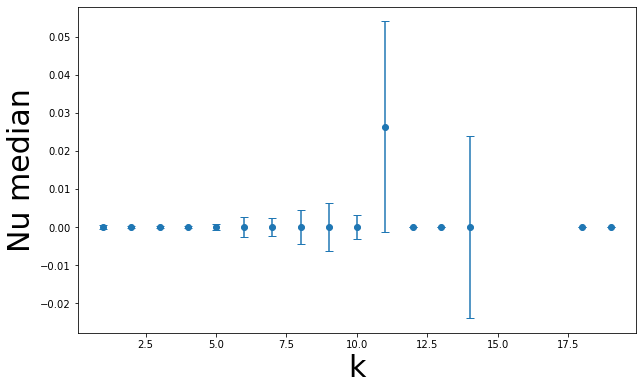

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="k", y="Nu_median", data=dfkNuPlot)

# Adicionar barras de erro usando plt.errorbar()
plt.errorbar(x=dfkNuPlot['k'], y=dfkNuPlot['Nu_median'], yerr=dfkNuPlot['SE'], linestyle='None', fmt='o', capsize=4)
ax = plt.gca()
ax.set_xlabel("k", fontsize=30)
ax.set_ylabel("Nu median", fontsize=30)

Calulating the k cores

In [28]:
#k_core_values = nx.core_number(G)

In [28]:
#kcore = pd.Series(dict(nx.core_number(G)))
dfkcoreNu = pd.DataFrame()
dfkcoreNu['kcore'] = kcore
dfkcoreNu = dfkcoreNu.sort_index()
dfkcoreNu

,kcore
0,2
1,2
2,1
3,1
4,1
...,...
4936,1
4937,1
4938,1
4939,2


In [29]:
dfkcoreNu['Nu']=Nu
dfkcoreNu

,kcore,Nu
0,2,7.134747e-23
1,2,9.534542e-24
2,1,9.534542e-24
3,1,5.148277e-22
4,1,1.341180e-22
...,...,...
4936,1,7.802362e-18
4937,1,5.298704e-18
4938,1,7.080941e-19
4939,2,7.466559e-17


/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Nu')

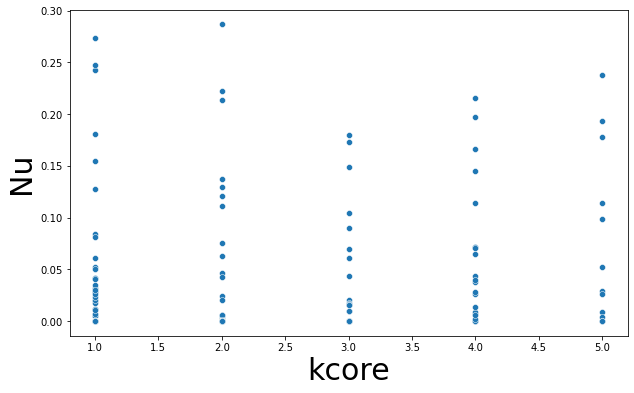

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="kcore", y="Nu", data=dfkcoreNu)
ax = plt.gca()
ax.set_xlabel("kcore", fontsize=30)
ax.set_ylabel("Nu", fontsize=30)

In [31]:
dfkcoreNuPlot = dfkcoreNu.groupby('kcore').agg({'Nu': ['mean', standard_error]}).reset_index()
dfkcoreNuPlot.columns = ['kcore', 'Nu_mean', 'SE']
dfkcoreNuPlot.fillna(0, inplace=True)
dfkcoreNuPlot

,kcore,Nu_mean,SE
0,1,0.001275,0.000346
1,2,0.000486,0.000162
2,3,0.004997,0.001711
3,4,0.055336,0.013408
4,5,0.078391,0.024437


In [ ]:
#logdfkc=dfkc.copy()
#logdfkc["kcore"]=np.log10(kcore)
#logdfkc["Nu"]=np.log10(Nu)
#logdfkc

In [ ]:
#dfaux4 = logdfkc.groupby('kcore').agg({'Nu': ['mean', 'std']}).reset_index()
#dfaux4.columns = ['kcore', 'mean', 'std']
#dfaux4.fillna(0, inplace=True)
#dfaux4

/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Nu mean')

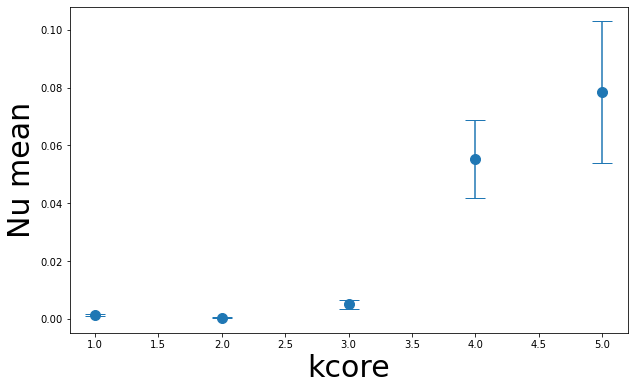

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="kcore", y="Nu_mean", data=dfkcoreNuPlot)

# Adicionar barras de erro usando plt.errorbar()
plt.errorbar(x=dfkcoreNuPlot['kcore'], y=dfkcoreNuPlot['Nu_mean'], yerr=dfkcoreNuPlot['SE'], linestyle='None', fmt='o', capsize=10,ms=10)
ax = plt.gca()
ax.set_xlabel("kcore", fontsize=30)
ax.set_ylabel("Nu mean", fontsize=30)

In [34]:
#logdfkcoreNu=dfkcoreNu.copy()
#logdfkcoreNu["kcore"]=np.log10(kcore)
#logdfkcoreNu["Nu"]=np.log10(Nu)
#logdfkcoreNu

In [35]:
#logdfkcoreNuPlot = logdfkcoreNu.groupby('kcore').agg({'Nu': ['mean', standard_error]}).reset_index()
#logdfkcoreNuPlot.columns = ['kcore', 'Nu_mean', 'SE']
#logdfkcoreNuPlot.fillna(0, inplace=True)
#logdfkcoreNuPlot

In [36]:
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x="kcore", y="Nu_mean", data=logdfkcoreNuPlot)

# Adicionar barras de erro usando plt.errorbar()
#plt.errorbar(x=logdfkcoreNuPlot['kcore'], y=logdfkcoreNuPlot['Nu_mean'], yerr=logdfkcoreNuPlot['SE'], linestyle='None', fmt='o', capsize=4,ms=10)

In [33]:
dfkcoreNuPlot = dfkcoreNu.groupby('kcore').agg({'Nu': ['median', standard_error]}).reset_index()
dfkcoreNuPlot.columns = ['kcore', 'Nu_median', 'SE']
dfkcoreNuPlot.fillna(0, inplace=True)
dfkcoreNuPlot

,kcore,Nu_median,SE
0,1,1.473974e-20,0.000346
1,2,1.107564e-19,0.000162
2,3,8.690108e-19,0.001711
3,4,3.278736e-02,0.013408
4,5,4.039287e-02,0.024437


/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/germano/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Nu median')

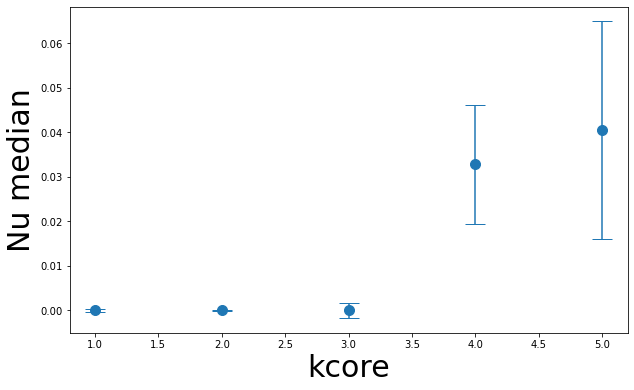

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="kcore", y="Nu_median", data=dfkcoreNuPlot)

# Adicionar barras de erro usando plt.errorbar()
plt.errorbar(x=dfkcoreNuPlot['kcore'], y=dfkcoreNuPlot['Nu_median'], yerr=dfkcoreNuPlot['SE'], linestyle='None', fmt='o', capsize=10,ms=10)
ax = plt.gca()
ax.set_xlabel("kcore", fontsize=30)
ax.set_ylabel("Nu median", fontsize=30)

In [ ]:
#kkcore = pd.DataFrame()
#kkcore["k"]=k
#kkcore["kcore"]=kcore
#kkcore = kkcore.sort_index()
#kkcore

In [ ]:
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x="kcore", y="k", data=kkcore)

#ax = plt.gca()
#ax.set_xlabel("kcore", fontsize=30)
#ax.set_ylabel("k", fontsize=30)

In [ ]:
#dfkkcorePlot = kkcore.groupby('kcore').agg({'k': ['mean', standard_error]}).reset_index()
#dfkkcorePlot.columns = ['kcore', 'k_mean', 'SE']
#dfkkcorePlot.fillna(0, inplace=True)
#dfkkcorePlot

In [ ]:
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x="kcore", y="k_mean", data=dfkkcorePlot)

# Adicionar barras de erro usando plt.errorbar()
#plt.errorbar(x=dfkkcorePlot['kcore'], y=dfkkcorePlot['k_mean'], yerr=dfkkcorePlot['SE'], linestyle='None', fmt='o', capsize=4,ms=10)
#ax = plt.gca()
#ax.set_xlabel("kcore", fontsize=30)
#ax.set_ylabel("k mean", fontsize=30)

In [ ]:
#sns.scatterplot(x="kcore", y="mean", data=dfaux5)